In [1]:
#import the OS for getting the file path
import os, sys
os.getcwd()

'/Users/abhilash/Downloads'

In [2]:
# import the importnant libraries
import numpy as np
import pandas as pd
#data visulazation library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#importing and reading dataset
df=pd.read_csv("City Power Consumption (1).csv")
df.head()

S no Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0     1       6.559     73.8      0.083                  0.051          0.119   
1     2       6.414     74.5      0.083                  0.070          0.085   
2     3       6.313     74.5       0.08                  0.062          0.100   
3     4       6.121       75      0.083                  0.091          0.096   
4     5       5.921     75.7      0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620

In [4]:
df.describe()

S no  general diffuse flows  diffuse flows  \
count  52583.000000           52275.000000   52568.000000   
mean   26292.000000             182.964247      74.872330   
std    15179.548939             264.571351     124.084858   
min        1.000000               0.004000       0.011000   
25%    13146.500000               0.062000       0.122000   
50%    26292.000000               5.226000       4.412000   
75%    39437.500000             320.100000     100.500000   
max    52583.000000            1163.000000     936.000000   

       Air Quality Index (PM)    Cloudiness   Power Consumption in A Zone  
count            52565.000000  52583.000000                  52583.000000  
mean               154.499191      0.009338                  31061.821779  
std                  2.871553      0.096180                   8021.057455  
min                150.000000      0.000000                   9457.750760  
25%                152.000000      0.000000                  24738.858990  
50%                155.000000      0.000000                  31189.787230  
75%                157.000000      0.000000                  36721.582445  
max                159.000000      1.000000                  52204.395120

In [5]:
df.shape

(52583, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
df.columns = df.columns.str.replace(' ','_')
df

S_no Temperature Humidity Wind_Speed  general_diffuse_flows  \
0          1       6.559     73.8      0.083                  0.051   
1          2       6.414     74.5      0.083                  0.070   
2          3       6.313     74.5       0.08                  0.062   
3          4       6.121       75      0.083                  0.091   
4          5       5.921     75.7      0.081                  0.048   
...      ...         ...      ...        ...                    ...   
52578  52579         NaN     75.6      0.094                436.200   
52579  52580         NaN     73.5      0.089                451.600   
52580  52581         NaN     70.1      0.085                466.400   
52581  52582         NaN    67.75      0.086                477.000   
52582  52583         NaN    66.24      0.088                485.700   

       diffuse_flows  Air_Quality_Index_(PM)  Cloudiness  \
0              0.119                   158.0           1   
1              0.085                   159.0           1   
2              0.100                   151.0           1   
3              0.096                   151.0           1   
4              0.085                   154.0           1   
...              ...                     ...         ...   
52578         38.960                   157.0           0   
52579         37.730                   157.0           0   
52580         37.490                   157.0           0   
52581         37.370                   152.0           0   
52582         36.720                   155.0           0   

       _Power_Consumption_in_A_Zone  
0                       34055.69620  
1                       29814.68354  
2                       29128.10127  
3                       28228.86076  
4                       27335.69620  
...                             ...  
52578                   34444.55696  
52579                   34438.48101  
52580                   33873.41772  
52581                   33988.86076  
52582                   34158.98734  

[52583 rows x 9 columns]

In [8]:
df=df.rename(columns={'_Power_Consumption_in_A_Zone':'A_Zone_Power_consumption'})

In [9]:
df.duplicated().sum()

0

# Box plot for Numerical Variables

In [10]:
features=['general_diffuse_flows','diffuse_flows','Air_Quality_Index_(PM)']

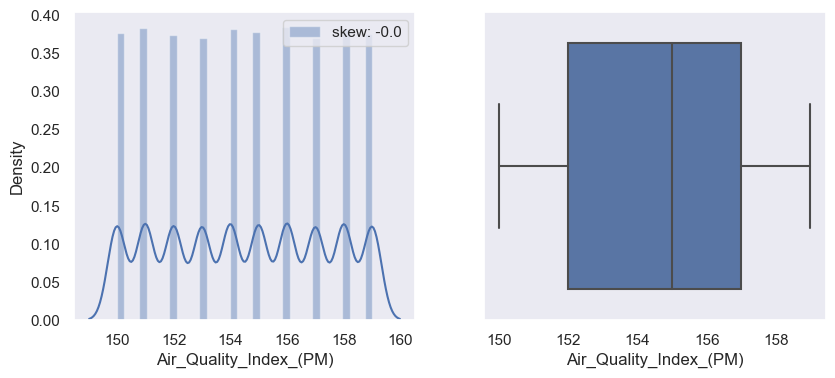

In [11]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col],label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.show()

# Pair plot for Numerical Variables

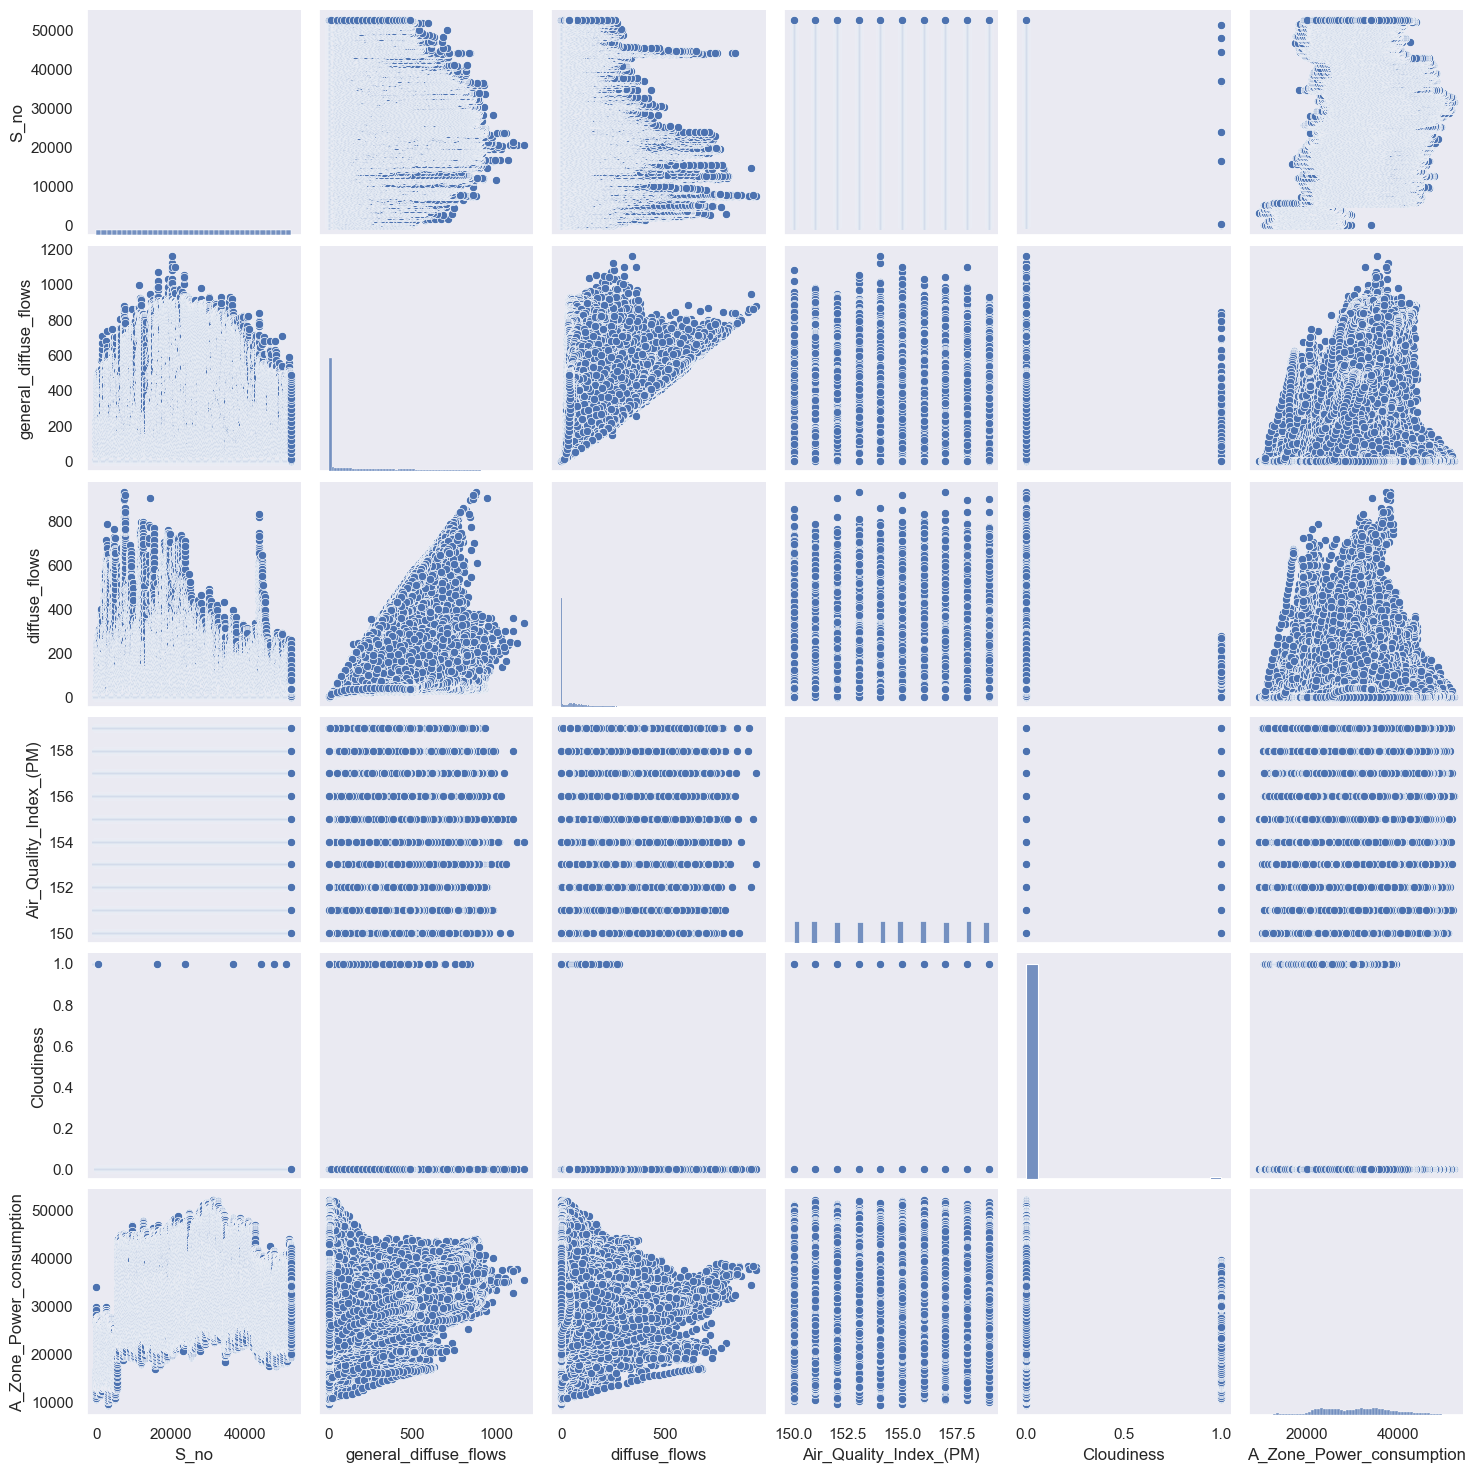

In [12]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(df)
plt.show()

# Heat map before Transformation

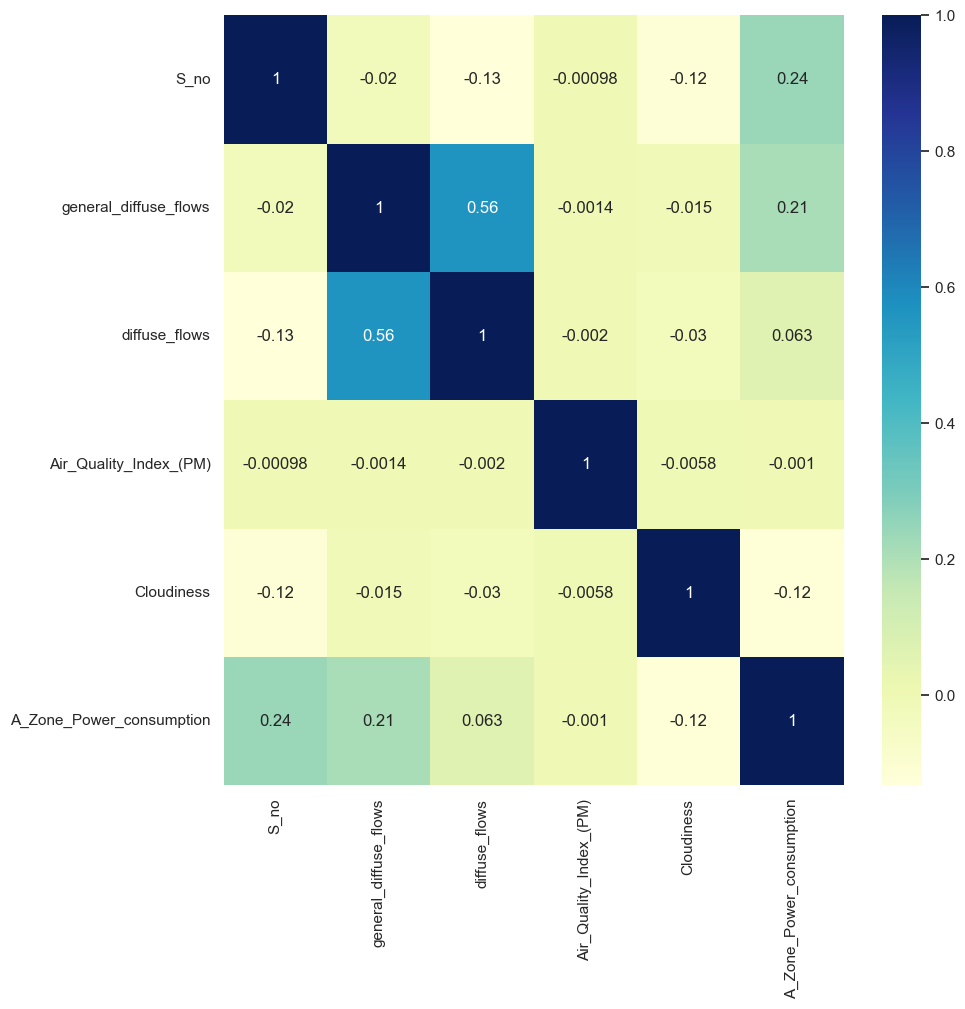

In [13]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,fmt='.2g')
plt.show()

In [14]:
df=df.drop(columns={'S_no','Cloudiness'},axis=1)

# Missing Values

In [15]:
missing_values=pd.DataFrame({'missing_count':df.isnull().sum(),'missing_count %':df.isnull().sum()/len(df)*100})
missing_values

missing_count  missing_count %
Temperature                         320         0.608562
Humidity                             25         0.047544
Wind_Speed                           71         0.135025
general_diffuse_flows               308         0.585741
diffuse_flows                        15         0.028526
Air_Quality_Index_(PM)               18         0.034232
A_Zone_Power_consumption              0         0.000000

# Fill Missing Values with Mode and Median Imputation

In [16]:
#Replace the missing values for categorical columns with mode
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mode()[0])
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])
df['Wind_Speed'] = df['Wind_Speed'].fillna(df['Wind_Speed'].mode()[0])

In [17]:
df['general_diffuse_flows']= df['general_diffuse_flows'].fillna(df['general_diffuse_flows'].median())
df['diffuse_flows']= df['diffuse_flows'].fillna(df['diffuse_flows'].median())
df['Air_Quality_Index_(PM)']= df['Air_Quality_Index_(PM)'].fillna(df['Air_Quality_Index_(PM)'].median())


In [18]:
missing_values=pd.DataFrame({'missing_count':df.isnull().sum(),'missing_count %':df.isnull().sum()/len(df)*100})
missing_values

missing_count  missing_count %
Temperature                           0              0.0
Humidity                              0              0.0
Wind_Speed                            0              0.0
general_diffuse_flows                 0              0.0
diffuse_flows                         0              0.0
Air_Quality_Index_(PM)                0              0.0
A_Zone_Power_consumption              0              0.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52583 non-null  object 
 1   Humidity                  52583 non-null  object 
 2   Wind_Speed                52583 non-null  object 
 3   general_diffuse_flows     52583 non-null  float64
 4   diffuse_flows             52583 non-null  float64
 5   Air_Quality_Index_(PM)    52583 non-null  float64
 6   A_Zone_Power_consumption  52583 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.8+ MB


# Capping the Outliers

In [20]:
df_cap=df.copy()

In [21]:
def iqr_capping(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        upper_whisker=q3+(factor*iqr)
        lower_whisker=q1-(factor*iqr)
        df[col]=np.where(df[col]>upper_whisker,upper_whisker,
                np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [22]:
iqr_capping(df_cap,features,1.5)

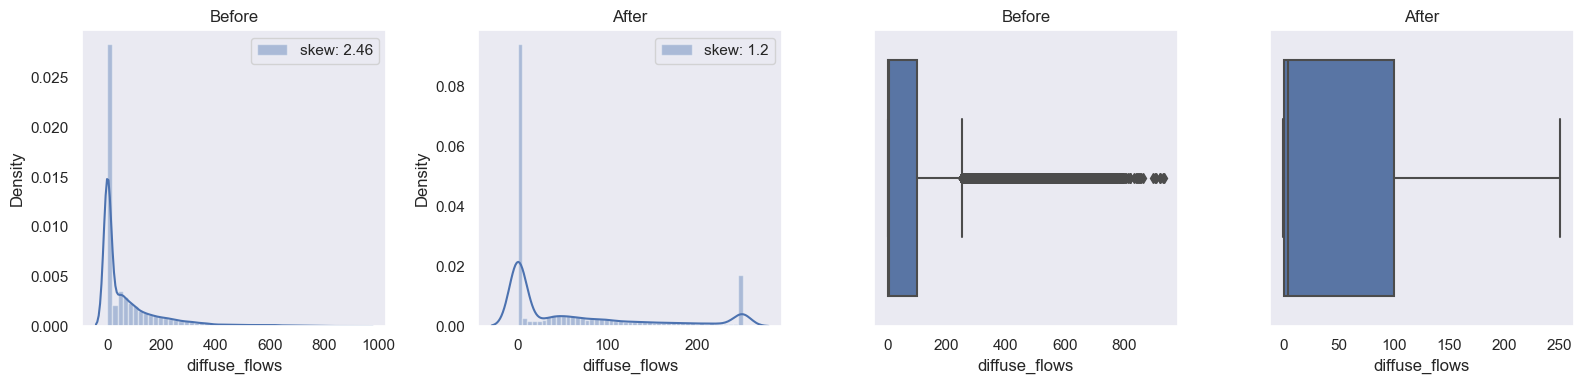

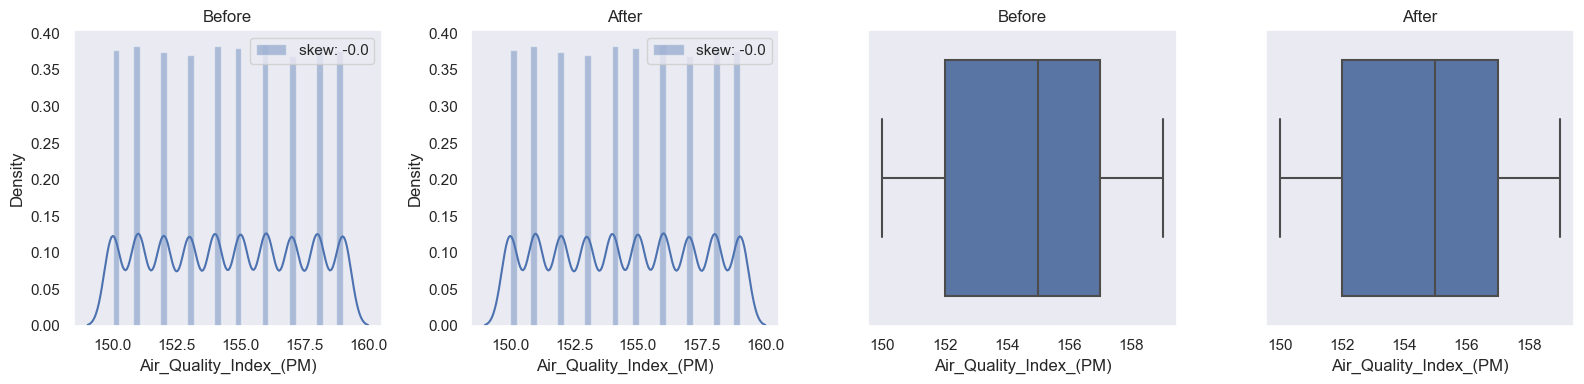

In [23]:
for col in features:
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    sns.distplot(df[col],label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    plt.subplot(142)
    sns.distplot(df_cap[col],label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [24]:
# Distribution of the observed variables in zone 1
sns.histplot(data=df, x='A_Zone_Power_consumption', bins=15, kde=True)
plt.show()

# Convert the Categorical variables in Numerical variables

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52583 non-null  object 
 1   Humidity                  52583 non-null  object 
 2   Wind_Speed                52583 non-null  object 
 3   general_diffuse_flows     52583 non-null  float64
 4   diffuse_flows             52583 non-null  float64
 5   Air_Quality_Index_(PM)    52583 non-null  float64
 6   A_Zone_Power_consumption  52583 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.8+ MB


In [26]:
df["Temperature"] = df["Temperature"].astype('category')
df["Humidity"] = df["Humidity"].astype('category')
df["Wind_Speed"] = df["Wind_Speed"].astype('category')               #https://pbpython.com/categorical-encoding.html
df["general_diffuse_flows"] = df["general_diffuse_flows"].astype('category')
df["diffuse_flows"] = df["diffuse_flows"].astype('category')
df["Air_Quality_Index_(PM)"] = df["Air_Quality_Index_(PM)"].astype('category')
df["A_Zone_Power_consumption"] = df["A_Zone_Power_consumption"].astype('category')
df.dtypes

Temperature                 category
Humidity                    category
Wind_Speed                  category
general_diffuse_flows       category
diffuse_flows               category
Air_Quality_Index_(PM)      category
A_Zone_Power_consumption    category
dtype: object

In [27]:
df["Temperature"] = df["Temperature"].cat.codes
df["Humidity"] = df["Humidity"].cat.codes
df["Wind_Speed"] = df["Wind_Speed"].cat.codes
df["general_diffuse_flows"] = df["general_diffuse_flows"].cat.codes
df["diffuse_flows"] = df["diffuse_flows"].cat.codes
df["Air_Quality_Index_(PM)"] = df["Air_Quality_Index_(PM)"].cat.codes
df["A_Zone_Power_consumption"] = df["A_Zone_Power_consumption"].cat.codes
df.head()

Temperature  Humidity  Wind_Speed  general_diffuse_flows  diffuse_flows  \
0         3010      4232          31                     13             30   
1         2968      4239          31                     20             20   
2         2946      4239          28                     17             24   
3         2902      4244          31                     27             23   
4         2853      4251          29                     12             20   

   Air_Quality_Index_(PM)  A_Zone_Power_consumption  
0                       8                     16921  
1                       9                     12124  
2                       1                     11390  
3                       1                     10416  
4                       4                      9474

# Heat map After the Transformation

In [28]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,fmt='.2g')
plt.show()

# Pair Plot after the Transformation

In [29]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(df)
plt.show()

In [30]:
df=df.drop(columns={'diffuse_flows','Air_Quality_Index_(PM)'},axis=1)

# Split the Independent Variables and Dependent Variable

In [31]:
X = df.drop('A_Zone_Power_consumption', axis=1)
y =df[['A_Zone_Power_consumption']]

# Import the Liabraries

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
import math
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Feature Importance

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [34]:
# Print the feature scores and names
for score in zip(model.feature_importances_):
    print(f"Feature: {score}")

Feature: (0.42521656735697777,)
Feature: (0.22432831942908193,)
Feature: (0.17311123961036112,)
Feature: (0.17734387360357926,)


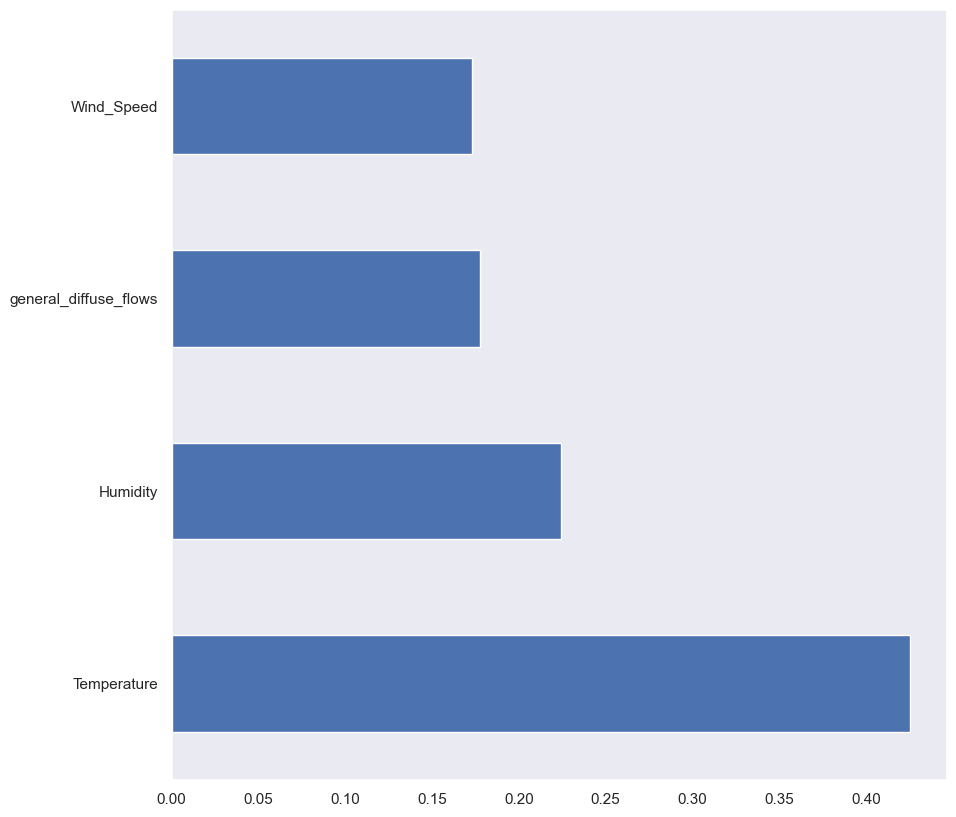

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

# Splitting the data into training and test for building the model and predicting with test data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 1. Linear Regression

In [37]:
lr = LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
y_pred_train1=lr.predict(X_train)

In [38]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred1))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train1))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred1)))

Testing_Accuracy:  0.09477677826682174
Training_Accuracy:  0.10314235200782806
Mean Absolute Error :  6137.184627761856
Mean Squared Error :  54968386.57213004
Root Mean Squared Error :  7414.066803862104


# 2. Lasso Regressor

In [39]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
lsr=model.fit(X_train, y_train)
y_pred2=lsr.predict(X_test)
y_pred_train2=lsr.predict(X_train)

In [40]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred2))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train2))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred2)))

Testing_Accuracy:  0.09477679008474815
Training_Accuracy:  0.1031423520074588
Mean Absolute Error :  6137.184659173937
Mean Squared Error :  54968385.85450334
Root Mean Squared Error :  7414.066755465811


# 3. Ridge Regressor

In [41]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
rr=model.fit(X_train, y_train)
y_pred3=rr.predict(X_test)
y_pred_train3=rr.predict(X_train)

In [42]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred3))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train3))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred3)))

Testing_Accuracy:  0.09477677826859932
Training_Accuracy:  0.10314235200782806
Mean Absolute Error :  6137.184627757707
Mean Squared Error :  54968386.572022095
Root Mean Squared Error :  7414.066803854825


# 4. Decision Tree Regressor

In [43]:
model = DecisionTreeRegressor(max_depth=15, random_state=42)
dtr=model.fit(X_train, y_train)
y_pred4 =dtr.predict(X_test)
y_pred_train4=dtr.predict(X_train)

In [44]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred4))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train4))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred4)))

Testing_Accuracy:  0.41337695943619435
Training_Accuracy:  0.7427338574925986
Mean Absolute Error :  4000.6031601151294
Mean Squared Error :  35621845.85155756
Root Mean Squared Error :  5968.403961827446


# 5. Random Forest Regressor

In [45]:
model=RandomForestRegressor(n_estimators=1000)
rfr=model.fit(X_train,y_train)
y_pred5=rfr.predict(X_test)
y_pred_train5=rfr.predict(X_train)

In [46]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred5))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train5))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred5)))

Testing_Accuracy:  0.5907985733280331
Training_Accuracy:  0.9440264159261313
Mean Absolute Error :  3487.2058285233456
Mean Squared Error :  24848171.884174034
Root Mean Squared Error :  4984.794066375664


# 6. XGB Regressor

In [47]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xr=model.fit(X_train, y_train)
y_pred6=xr.predict(X_test)
y_pred_train6=xr.predict(X_train)

In [48]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred6))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train6))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred6)))

Testing_Accuracy:  0.4763449448037861
Training_Accuracy:  0.5361494754916388
Mean Absolute Error :  4370.5884
Mean Squared Error :  31798204.0
Root Mean Squared Error :  5638.989625810638


# Accuracy Without Applying PCA

In [49]:
LR=['Linear Regressor',09.47,10.31,6137.18,54968386.57,7414.06]
LassoR=['Lasso Regressor',09.47,10.31,6137.18,54968385.85,7414.06]
RidgeR=['Ridge Regressor',09.47,10.31,6137.18,54968386.5,7414.06]
DTR=['Decision Tree Regressor',41.33,74.27,4000.6,35621845.8,5968.40]
RFR=['Random Forest Regressor',59.05,94.40,3487.00,24862252.95,4986.20]
XGR=['XG Boost Regressor',47.63,53.61,4370.5884,31798204,5638.989]
Table=pd.DataFrame([RFR,XGR,DTR,LR,LassoR,RidgeR])
Table.columns=['Model_Name','Testing_Accuracyin %','Training_Accuracy in%','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
Table

Model_Name  Testing_Accuracyin %  Training_Accuracy in%  \
0  Random Forest Regressor                 59.05                  94.40   
1       XG Boost Regressor                 47.63                  53.61   
2  Decision Tree Regressor                 41.33                  74.27   
3         Linear Regressor                  9.47                  10.31   
4          Lasso Regressor                  9.47                  10.31   
5          Ridge Regressor                  9.47                  10.31   

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  
0            3487.0000         24862252.95                 4986.200  
1            4370.5884         31798204.00                 5638.989  
2            4000.6000         35621845.80                 5968.400  
3            6137.1800         54968386.57                 7414.060  
4            6137.1800         54968385.85                 7414.060  
5            6137.1800         54968386.50                 7414.060

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df[['Temperature','Humidity','Wind_Speed','general_diffuse_flows','A_Zone_Power_consumption']]
scaledX = scale.fit_transform(X)
print(scaledX)

[[ 2.65368866  0.64809633 -0.81400663 -0.88985403  0.44721307]
 [ 2.59627296  0.65478644 -0.81400663 -0.88803418 -0.16772993]
 [ 2.56619806  0.65478644 -0.8281671  -0.88881412 -0.26182377]
 ...
 [ 0.01256631  0.61273433 -0.80456632  1.22715284  0.41965152]
 [ 0.01256631  0.39769516 -0.79984617  1.25341069  0.43747039]
 [ 0.01256631  0.25337999 -0.79040586  1.27498893  0.46233987]]


# Principal Component Analysis

In [51]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
pca.fit_transform(scaledX)
X_pca = pca.transform(scaledX)

In [52]:
scaledX.shape

(52583, 5)

In [53]:
X_pca.shape

(52583, 2)

# Splitting the data into training and test for building the model and predicting with test data 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Algorithms

# 1. Linear Regression

In [55]:
lr = LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
y_pred_train1=lr.predict(X_train)

In [56]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred1))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train1))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred1)))

Testing_Accuracy:  0.3149362375750736
Training_Accuracy:  0.32397939699021494
Mean Absolute Error :  5154.962815240532
Mean Squared Error :  41599518.01438746
Root Mean Squared Error :  6449.768834182157


# 2. Lasso Regressor

In [57]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
lsr=model.fit(X_train, y_train)
y_pred2=lsr.predict(X_test)
y_pred_train2=lsr.predict(X_train)

In [58]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred2))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train2))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred2)))


Testing_Accuracy:  0.31493809765957814
Training_Accuracy:  0.3239793716735564
Mean Absolute Error :  5155.000648912967
Mean Squared Error :  41599405.06341399
Root Mean Squared Error :  6449.760077972977


# 3. Ridge Regressor

In [59]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
rr=model.fit(X_train, y_train)
y_pred3=rr.predict(X_test)
y_pred_train3=rr.predict(X_train)

In [60]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred3))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train3))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred3)))

Testing_Accuracy:  0.31493628504993576
Training_Accuracy:  0.3239793969230834
Mean Absolute Error :  5154.967086272083
Mean Squared Error :  41599515.1315443
Root Mean Squared Error :  6449.768610697929


# 4. Decision Tree Regressor

In [61]:
model = DecisionTreeRegressor(max_depth=15, random_state=42)
dtr=model.fit(X_train, y_train)
y_pred4 =dtr.predict(X_test)
y_pred_train4=dtr.predict(X_train)

In [62]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred4))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train4))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred4)))


Testing_Accuracy:  0.6078485935771922
Training_Accuracy:  0.8666427614927182
Mean Absolute Error :  3153.306487981693
Mean Squared Error :  23812833.769091215
Root Mean Squared Error :  4879.839522883023


# 5. Random Forest Regressor

In [63]:
model=RandomForestRegressor(n_estimators=1000)
rfr=model.fit(X_train,y_train)
y_pred5=rfr.predict(X_test)
y_pred_train5=rfr.predict(X_train)

In [64]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred5))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train5))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred5)))


Testing_Accuracy:  0.689249220339845
Training_Accuracy:  0.9602188408574576
Mean Absolute Error :  2934.198188652932
Mean Squared Error :  18869897.030751493
Root Mean Squared Error :  4343.949473779764


# 6. XG Boost Regressor

In [65]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xr=model.fit(X_train, y_train)
y_pred6=xr.predict(X_test)
y_pred_train6=xr.predict(X_train)

In [66]:
print('Testing_Accuracy: ',r2_score(y_test,y_pred6))
print('Training_Accuracy: ',r2_score(y_train,y_pred_train6))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred6)))

Testing_Accuracy:  0.7150029481715172
Training_Accuracy:  0.749758351012606
Mean Absolute Error :  2935.6746
Mean Squared Error :  17306038.0
Root Mean Squared Error :  4160.05264389767


# Accuracy With Applying PCA

In [67]:
LR=['Linear Regressor',31.49,32.39,5154.96,41599518.01,6449.76]
LassoR=['Lasso Regressor',31.49,32.39,5154.96,41599518.01,6449.76]
RidgeR=['Ridge Regressor',31.49,32.39,5154.96,41599518.01,6449.76]
DTR=['Decision Tree Regressor',60.78,86.66,3153.30,23812833.76,4879.83]
RFR=['Random Forest Regressor',68.90,96.02,2935.01,18879836.85,4345.09]
XGR=['XG Boost Regressor',71.50,74.97,2935.67,17306038.0,4160.05]
Table=pd.DataFrame([XGR,RFR,DTR,LR,LassoR,RidgeR])
Table.columns=['Model_Name','Testing_Accuracy in %','Training_Accuracy in%','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
Table

Model_Name  Testing_Accuracy in %  Training_Accuracy in%  \
0       XG Boost Regressor                  71.50                  74.97   
1  Random Forest Regressor                  68.90                  96.02   
2  Decision Tree Regressor                  60.78                  86.66   
3         Linear Regressor                  31.49                  32.39   
4          Lasso Regressor                  31.49                  32.39   
5          Ridge Regressor                  31.49                  32.39   

   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  
0              2935.67         17306038.00                  4160.05  
1              2935.01         18879836.85                  4345.09  
2              3153.30         23812833.76                  4879.83  
3              5154.96         41599518.01                  6449.76  
4              5154.96         41599518.01                  6449.76  
5              5154.96         41599518.01                  6449.76

# Algorithms by Using Cross-Validation

# 1. Linear Regression

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
#build multiple linear regression model
model = LinearRegression()
scores = cross_val_score(model, X_pca, y, scoring='r2',
                         cv=cv, n_jobs=-1).mean()
print(scores)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.32109264732279924


# 2. Lasso Regressor

In [69]:
model = Lasso(alpha=1.0)
scores = cross_val_score(model, X_pca, y, scoring='r2',
                         cv=cv, n_jobs=-1).mean()
print(scores)

0.3210926395864342


# 3.Ridge Regressor

In [70]:
model = Ridge(alpha=1.0)
scores = cross_val_score(model, X_pca, y, scoring='r2',
                         cv=cv, n_jobs=-1).mean()
print(scores)

0.3210926490461365


# 4.Decision Tree Regressor

In [71]:
model=DecisionTreeRegressor(max_depth=15, random_state=42)
scores = cross_val_score(model, X_pca, y, scoring='r2',
                         cv=cv, n_jobs=-1).mean()
print(scores)

0.6406843042061799


# 5. XGB Regressor

In [72]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
scores = cross_val_score(model, X_pca, y, scoring='r2', cv=cv, n_jobs=-1).mean()
print(scores)

0.7218952871983223


# 6. Random Forest Regressor

In [73]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1).mean()
# report performance
print(n_scores)

0.6865940597008816


In [74]:
LR=['Linear Regressor',32.10]
LassoR=['Lasso Regressor',32.10]
RidgeR=['Ridge Regressor',32.10]
DTR=['Decision Tree Regressor',64.06]
RFR=['Random Forest Regressor',68.47]
XGR=['XG Boost Regressor',72.18]
Table=pd.DataFrame([XGR,RFR,DTR,LR,LassoR,RidgeR])
Table.columns=['Model_Name','Testing_Accuracyin %']
Table

Model_Name  Testing_Accuracyin %
0       XG Boost Regressor                 72.18
1  Random Forest Regressor                 68.47
2  Decision Tree Regressor                 64.06
3         Linear Regressor                 32.10
4          Lasso Regressor                 32.10
5          Ridge Regressor                 32.10